### If in doubt, run the code!
* follow stackoverflow

#### What is a classification problem?
* spam or not spam
* How to represent images?
  * (224,224,3) tensors
  * [batch_size, color_channels,width,height]


## 1. Make classification data and get it ready

In [100]:
## 1. Data

import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles

X, y= make_circles(n_samples,noise=0.03, random_state=42)

In [101]:
len(X),len(y)

(1000, 1000)

In [102]:
print(f"First 5 samples of X : \n {X[:5]}")

print(f"First 5 samples of y : \n {y[:5]}")



First 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : 
 [1 1 1 1 0]


In [103]:
# Make DataFRame of circle data

import pandas as pd

circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})

In [104]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


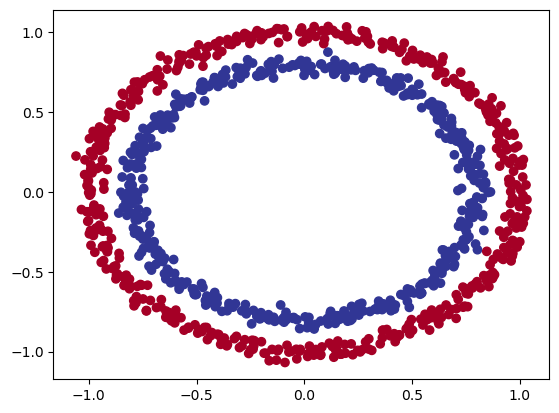

In [105]:
# Visualize, visualize, visualize

import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],  y = X[:,1], c = y, cmap = plt.cm.RdYlBu)

Note : The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment and practice the fundamentals

### 1.1 Check input and output shapes

In [106]:
X.shape, y.shape

((1000, 2), (1000,))

In [107]:
# view the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y : {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y : 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [108]:
# Turn data into tensors
import torch

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [109]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [110]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [111]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [112]:
## 2. Building a model



# 1. setup device agonistic code
# 2. Construct a model
# 3. Defice a loss and optimizer
# 4. create a training and test loop

In [113]:
# Import Pytorch and nn


import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [114]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setp device agnostic code, let's create a create a model that:

1. Subclasses `nn.Module` (almost all models in Pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target device




In [115]:
# 1. Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of 
        self.layer_1 = nn.Linear(in_features=2,out_features=5)
        self.layer_2 = nn.Linear(in_features=5,out_features=1)
        self.two_linear_layers = nn.Sequential(
            nn.Linear(2,5),
            nn.Linear(5,1)
        )
    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        #self.nonlinearity(self.layer_2(self.layer_1(x)))
        return self.two_linear_layers(x)


model_0 = CircleModelV0().to(device)


In [116]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [162]:
# Let's replicate the model using nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
  
    nn.Linear(in_features=5,out_features=1)
).to(device)



model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('1.bias', tensor([-0.2060], device='cuda:0'))])

In [163]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)},shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions : 200, shape: torch.Size([200, 1])
Length of test samples : 200,shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


### 2.1 Setup liss function and optimizer

Which loss function or optimizer should you use?

For this time, proper loss is binary cross entropy or categorical cross entropy


In [164]:
# Setup the loss function

loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activate function prior to 

loss_fn = nn.Sequential(
    nn.BCELoss(),
    nn.Sigmoid()
)

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function builtin


optimizer = torch.optim.Adam(params=model_0.parameters(),lr = 0.001)

In [165]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

### 3. Train model

### 3.1 going from raw logits -> prediction probabilities -> prediction labels
  our model outputs are going to be raw **logits**

  We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary cross classification and softmax for multiclass classification)


  **logits** : outputs before activation

In [166]:
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_pred_labels = torch.round(torch.sigmoid(y_logits))
y_pred_labels,y_test.to(device)[:5]


(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

For our prediction probability values, we need to perform a range style rounding on them:

* `y_pred_probs >=0.5,y=1` (C1)
* `y_pred_probs <0.5,y=0`  (C0)

### 3.2 building a training and testing loop

In [167]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Set the number of epochs
epochs = 10000

# Put data to target device
X_train, y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# Building training and evaluation loop
for epoch in range(epochs):
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss / accuracy
  # loss = loss_fn(torch.sigmoid(y_logits))
  # nn.BCELoss expects prediction probabilities as input

  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train,y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss / acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_preds)

    # Print out what's happening?

    if epoch %100==0:
      print(f"Epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Tess acc: {test_acc:.2f}%")


Epoch:0 | Loss: 0.69569, Acc: 50.00% | Test loss: 0.69729 | Tess acc: 50.00%
Epoch:100 | Loss: 0.69298, Acc: 51.38% | Test loss: 0.69468 | Tess acc: 45.00%
Epoch:200 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468 | Tess acc: 46.00%
Epoch:300 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468 | Tess acc: 46.00%
Epoch:400 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468 | Tess acc: 46.00%
Epoch:500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468 | Tess acc: 46.00%
Epoch:600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468 | Tess acc: 46.00%
Epoch:700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468 | Tess acc: 46.00%
Epoch:800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468 | Tess acc: 46.00%
Epoch:900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468 | Tess acc: 46.00%
Epoch:1000 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468 | Tess acc: 46.00%
Epoch:1100 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468 | Tess acc: 46.00%
Epoch:1200 | Loss: 0.69298, Acc: 51.00% | Test loss:

In [98]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [63]:
def plot_predictions(
        train_data = X_train,
        train_labels = y_train,
        test_data = X_test,
        test_labels = y_test,
        predictions = None):
    plt.figure(figsize = (10,7))

    # plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

    # plot test data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

    # show the legend
    plt.legend(prop = {"size":14})

## 4. Make predictions and evaluate the model

To visulize the model, we're going to import a function called `plot_decision_boundary()`

In [64]:
import requests
from pathlib import Path

# Download helper functions from learn pytorch reppo
if Path("./helper_function.py").is_file():
    print("helper_functions.py already exists. skip downloading.")
else:
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)


from helper_functions import plot_decision_boundary, plot_predictions


Download helper_functions.py


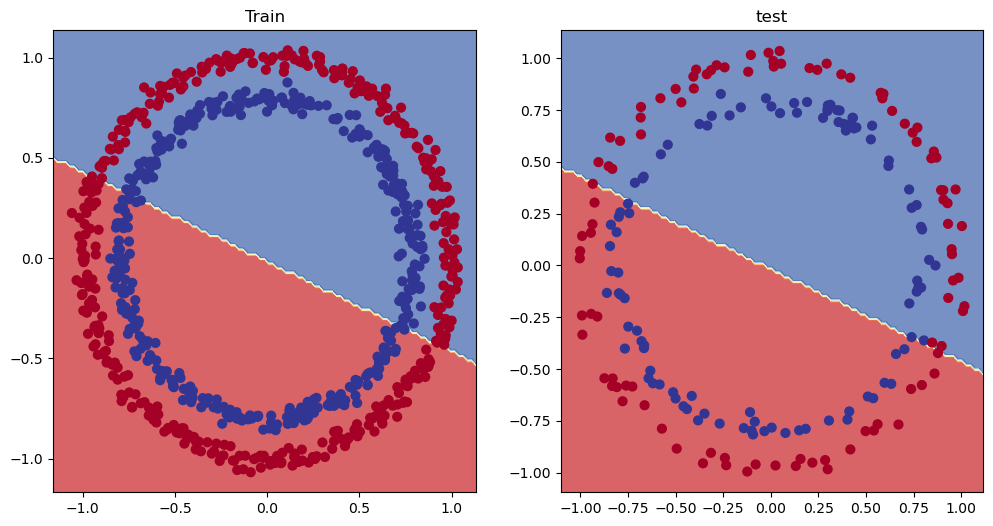

In [65]:
# Plot decision boundary of the model

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

### 5. Improving a model(from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions


In [172]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [184]:
# Create a loss function
loss_fn = torch.nn.BCEWithLogitsLoss()
# Create a optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [188]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 10000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(X_train).squeeze()
    y_pred_labels = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred_labels)
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

    if epoch % 100==0:
        print(f"epoch: {epoch} | train loss: {loss:.5f} | train acc : {acc:.2f} %| test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%")

epoch: 0 | train loss: 0.69298 | train acc : 51.00 %| test loss: 0.69468 | test acc: 46.00%
epoch: 100 | train loss: 0.69298 | train acc : 51.00 %| test loss: 0.69468 | test acc: 46.00%
epoch: 200 | train loss: 0.69298 | train acc : 51.00 %| test loss: 0.69468 | test acc: 46.00%
epoch: 300 | train loss: 0.69298 | train acc : 51.00 %| test loss: 0.69468 | test acc: 46.00%
epoch: 400 | train loss: 0.69298 | train acc : 51.00 %| test loss: 0.69468 | test acc: 46.00%
epoch: 500 | train loss: 0.69298 | train acc : 51.00 %| test loss: 0.69468 | test acc: 46.00%
epoch: 600 | train loss: 0.69298 | train acc : 51.00 %| test loss: 0.69468 | test acc: 46.00%
epoch: 700 | train loss: 0.69298 | train acc : 51.00 %| test loss: 0.69468 | test acc: 46.00%
epoch: 800 | train loss: 0.69298 | train acc : 51.00 %| test loss: 0.69468 | test acc: 46.00%
epoch: 900 | train loss: 0.69298 | train acc : 51.00 %| test loss: 0.69468 | test acc: 46.00%
epoch: 1000 | train loss: 0.69298 | train acc : 51.00 %| test 

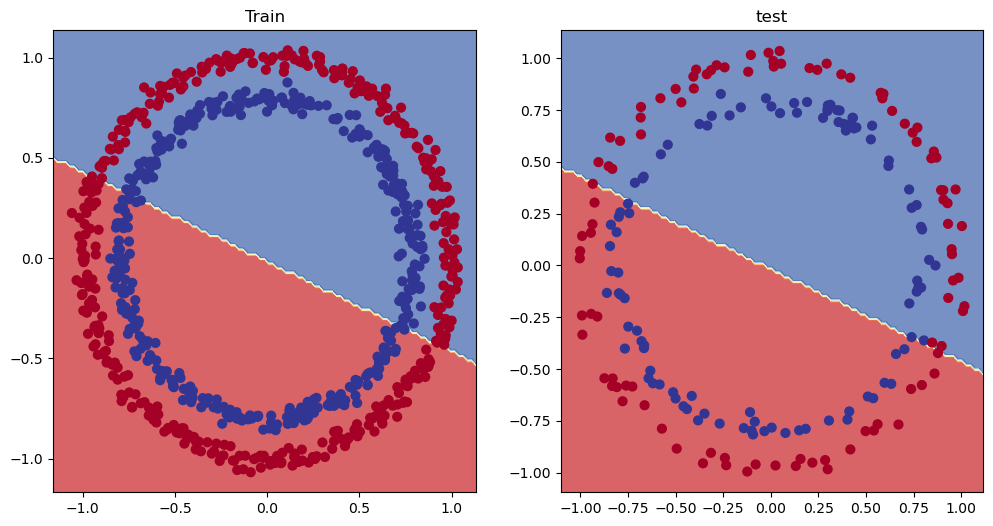

In [190]:
# Plot decision boundary of the model

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line



In [196]:
# Create some data

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias


# Check the data
print(len(X_regression))

X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [197]:
# Create train and test splits
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:],y_regression[train_split:]

# Check length
len(X_train_regression)

80

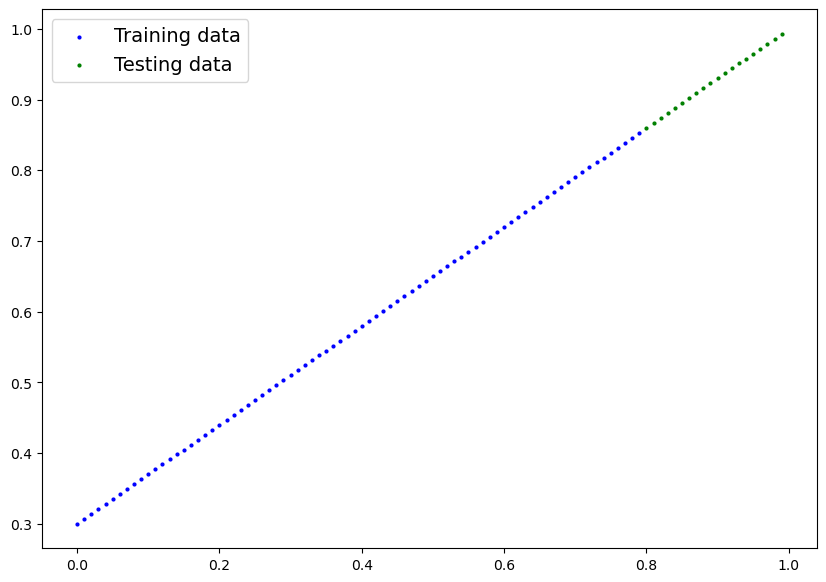

In [200]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression,test_data = X_test_regression,test_labels=y_test_regression)

### 5.2 Adjusting model_1 to fit a straight line

In [242]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

In [243]:
# loss and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr= 0.01)

In [244]:
next(model_2.parameters()).device

device(type='cuda', index=0)

In [245]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10000

# put the data on the target device
X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

# training

for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, test_pred)


    if epoch%100==0:
        print(f"epoch: {epoch} | loss: {loss:.5f} | test loss: {loss:.5f}")

epoch: 0 | loss: 0.75986 | test loss: 0.75986
epoch: 100 | loss: 0.02858 | test loss: 0.02858
epoch: 200 | loss: 0.02533 | test loss: 0.02533
epoch: 300 | loss: 0.02137 | test loss: 0.02137
epoch: 400 | loss: 0.01964 | test loss: 0.01964
epoch: 500 | loss: 0.01940 | test loss: 0.01940
epoch: 600 | loss: 0.01903 | test loss: 0.01903
epoch: 700 | loss: 0.01878 | test loss: 0.01878
epoch: 800 | loss: 0.01840 | test loss: 0.01840
epoch: 900 | loss: 0.01798 | test loss: 0.01798
epoch: 1000 | loss: 0.01782 | test loss: 0.01782
epoch: 1100 | loss: 0.01674 | test loss: 0.01674
epoch: 1200 | loss: 0.01640 | test loss: 0.01640
epoch: 1300 | loss: 0.01648 | test loss: 0.01648
epoch: 1400 | loss: 0.01648 | test loss: 0.01648
epoch: 1500 | loss: 0.01632 | test loss: 0.01632
epoch: 1600 | loss: 0.01596 | test loss: 0.01596
epoch: 1700 | loss: 0.01458 | test loss: 0.01458
epoch: 1800 | loss: 0.01532 | test loss: 0.01532
epoch: 1900 | loss: 0.01406 | test loss: 0.01406
epoch: 2000 | loss: 0.01460 | te

In [246]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)


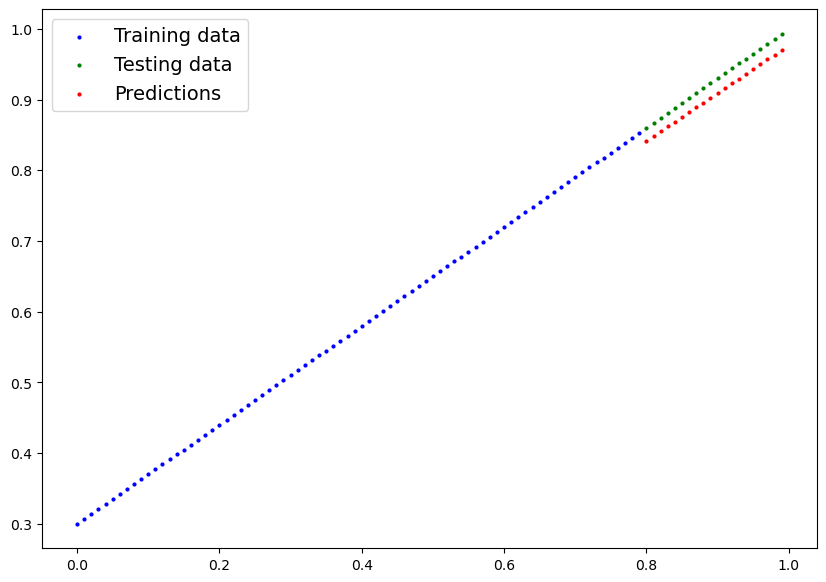

In [247]:
plot_predictions(train_data=X_train_regression.cpu(),train_labels=y_train_regression.cpu(),test_data=X_test_regression.cpu(),test_labels=y_test_regression.cpu(),predictions=y_preds.cpu())

## 6. the missing piece : non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"
Or in machine learning terms, an infinite

### 6.1 recreating non-linear datas

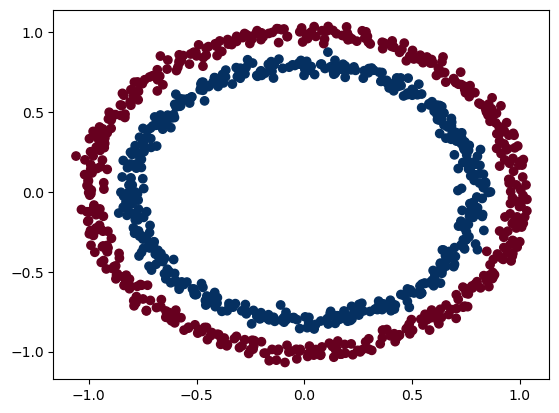

In [289]:
# make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, random_state=42, noise = 0.03)

plt.scatter(X[:,0],X[:,1], c=y, cmap = plt.cm.RdBu)

In [290]:
# Convert data to tensors and then to train and test splits


X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [291]:
from torch  import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Where should we put our non-linear activation functions?



        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [292]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [293]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)

In [294]:
# ramdom seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data to target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 2400

for epoch in range(epochs):
    ### Training
    model_3.train()

    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred= torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    
    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward()
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's really happening?
    if epoch % 100 ==0:
        print(f"epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

epoch: 0 | Loss: 0.6929 | Acc: 50.00% | Test loss: 0.6932 | Test acc: 50.00%
epoch: 100 | Loss: 0.6912 | Acc: 52.88% | Test loss: 0.6910 | Test acc: 52.50%
epoch: 200 | Loss: 0.6898 | Acc: 53.37% | Test loss: 0.6894 | Test acc: 55.00%
epoch: 300 | Loss: 0.6879 | Acc: 53.00% | Test loss: 0.6872 | Test acc: 56.00%
epoch: 400 | Loss: 0.6852 | Acc: 52.75% | Test loss: 0.6841 | Test acc: 56.50%
epoch: 500 | Loss: 0.6810 | Acc: 52.75% | Test loss: 0.6794 | Test acc: 56.50%
epoch: 600 | Loss: 0.6751 | Acc: 54.50% | Test loss: 0.6729 | Test acc: 56.00%
epoch: 700 | Loss: 0.6666 | Acc: 58.38% | Test loss: 0.6632 | Test acc: 59.00%
epoch: 800 | Loss: 0.6516 | Acc: 64.00% | Test loss: 0.6476 | Test acc: 67.50%
epoch: 900 | Loss: 0.6236 | Acc: 74.00% | Test loss: 0.6215 | Test acc: 79.00%
epoch: 1000 | Loss: 0.5682 | Acc: 87.75% | Test loss: 0.5738 | Test acc: 86.50%
epoch: 1100 | Loss: 0.4815 | Acc: 93.50% | Test loss: 0.4993 | Test acc: 90.50%
epoch: 1200 | Loss: 0.3706 | Acc: 97.75% | Test loss

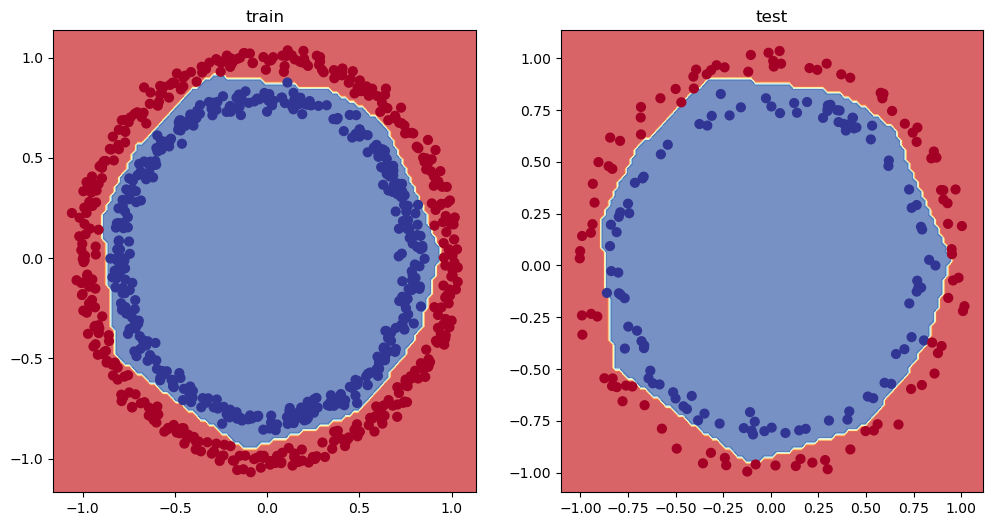

In [295]:
# Plot decision boundaries

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3, X=X_test, y = test_pred)

### 7. Replicating non-linear activation functions
Neural networks, rather than us telling the model whatto learn, we give it the tools to discover patterns in data and patterns on its own.



In [297]:
# Create a tensor
A = torch.arange(-10.,10.,1.)
A.dtype

torch.float32

In [298]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

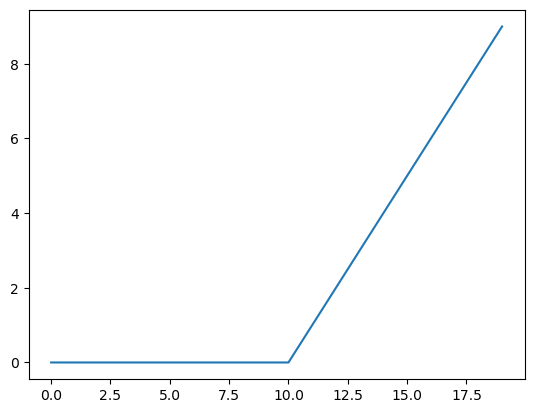

In [299]:
plt.plot(torch.relu(A))

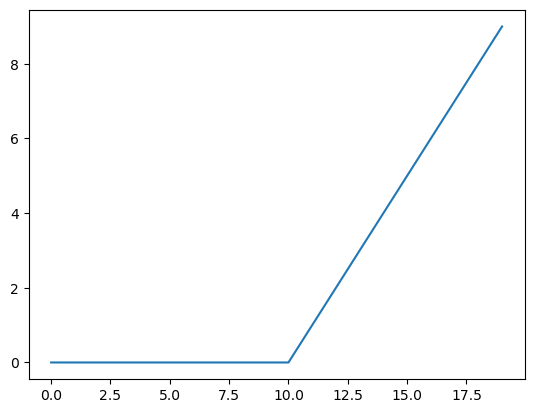

In [302]:
def relu(x : torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0),x)


plt.plot(relu(A))

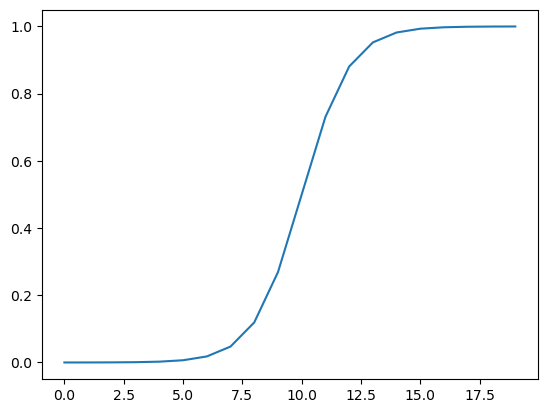

In [303]:
def sigmoid(x):
    return 1/ (1+ torch.exp(-x))

plt.plot(sigmoid(A))

### 8.1 Creating a toy multi-class dataset

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
